In [1]:
# From https://medium.com/@zfwong.wilson/web-scraping-e-commerce-sites-to-compare-prices-with-python-part-1-360509ee5c62

In [2]:
#!pip install selenium

### Scraping for the following:
    Product name; and
    Product price

In [56]:
# For Web scraping
from selenium import webdriver
from selenium.common.exceptions import *

# For data manipulation
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Define the global variables

In [57]:
webdriver_path = 'C:/Users/monic/Desktop/Repository/Web_scrapping/chromedriver' # Enter the file directory of the Chromedriver
#'C:/Program Files (x86)/Google/Chrome/Application/chrome.exe'
#Lazada_url = 'https://www.lazada.com.my'
Lazada_url = 'https://www.amazon.com.mx/tablets/b?ie=UTF8&node=10189676011'
search_item = 'Nescafe Gold refill 170g' # Chose this because I often search for coffee!

### Select custom Chrome options

In [58]:
# Select custom Chrome options
options = webdriver.ChromeOptions()
#options.add_argument('--headless') 
options.add_argument('start-maximized') 
options.add_argument('disable-infobars')
options.add_argument('--disable-extensions')

### Open the Chrome browser

In [59]:
# Open the Chrome browser
browser = webdriver.Chrome(webdriver_path, options=options)
browser.get(Lazada_url)

### Search item

In [7]:
search_bar = browser.find_element_by_id('q')
search_bar.send_keys(search_item)#.submit() aqui no funcionó el del source code original

### Click/submit button

In [8]:
search_bar_click = browser.find_element_by_class_name('search-box__button--1oH7') # Buscar el boton de busqueda

In [9]:
search_bar_click.submit() # Darle click

### Items and price names

In [65]:
#item_titles = browser.find_elements_by_class_name('c16H9d')
item_titles = browser.find_elements_by_class_name('a-size-base s-inline s-access-title a-text-normal')

#item_prices = browser.find_elements_by_class_name('c13VH6')
item_prices = browser.find_elements_by_class_name('a-size-base a-color-price s-price a-text-bold')
#item_prices = browser.find_elements_by_xpath('//*[@id="root"]/div/div[2]/div[1]/div/div[1]/div[2]/div[5]/div/div/div[2]/div[3]/span')

In [66]:
item_titles

[]

### Create the list

In [61]:
# Initialize empty lists
titles_list = []
prices_list = []
# Loop over the item_titles and item_prices
for title in item_titles:
    titles_list.append(title.text)
for price in item_prices:
    prices_list.append(price.text)

In [62]:
titles_list

[]

In [63]:
prices_list

[]

### Iterate over pages

In [14]:
try:
    browser.find_element_by_xpath('//*[@class=”ant-pagination-next” and not(@aria-disabled)]').click()
except NoSuchElementException:
    #continue
    browser.quit()

### Convert to DF

In [15]:
item_names = pd.DataFrame(titles_list, columns=['ItemName'])
item_names

,ItemName
0,NESCAFE GOLD Original Refill Pack 170g
1,NESCAFE GOLD Refill 170g
2,NESCAFE GOLD Refill 170g x2 packs
3,[buy 3 get extra discount] TTLET NESCAFE GOLD ...
4,NESCAFE GOLD REFILL 170g EXP 01/2021
5,[EXPIRY 05/2021] NESCAFE Gold Refill Pack 170g...
6,Nescafe Gold Refill Pack 170g
7,NESCAFE Gold Refill Twin Pack x 170g
8,Nescafe Gold Refill Pack 170g
9,NESCAFE GOLD Refill 170g


In [35]:
item_prices = pd.DataFrame(prices_list, columns=['Price'])
item_prices

,Price
0,RM19.90
1,RM26.76
2,RM26.76
3,RM54.99
4,RM60.00
5,RM40.99
6,RM54.00
7,RM20.20
8,RM27.00
9,RM47.80


In [36]:
item_prices = pd.DataFrame(item_prices['Price'].str.slice(start=2).astype(float))
item_prices

,Price
0,19.90
1,26.76
2,26.76
3,54.99
4,60.00
5,40.99
6,54.00
7,20.20
8,27.00
9,47.80


### Join columns

In [37]:
db = pd.concat([item_names['ItemName'],item_prices['Price']], axis=1, join='inner')
db

,ItemName,Price
0,NESCAFE GOLD Original Refill Pack 170g,19.90
1,NESCAFE GOLD Refill 170g,26.76
2,NESCAFE GOLD Refill 170g x2 packs,26.76
3,[buy 3 get extra discount] TTLET NESCAFE GOLD ...,54.99
4,NESCAFE GOLD REFILL 170g EXP 01/2021,60.00
5,[EXPIRY 05/2021] NESCAFE Gold Refill Pack 170g...,40.99
6,Nescafe Gold Refill Pack 170g,54.00
7,NESCAFE Gold Refill Twin Pack x 170g,20.20
8,Nescafe Gold Refill Pack 170g,27.00
9,NESCAFE GOLD Refill 170g,47.80


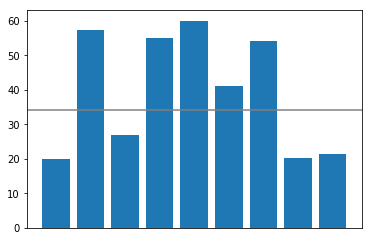

In [51]:
plt.bar(db.ItemName,db.Price)
plt.axhline(db['Price'].median(), color="gray")
plt.xticks([])
plt.show()

### Save to csv

In [54]:
db.to_csv('Lazada_nescafe_170g_prices', index=False)

In [55]:
pd.read_csv('Lazada_nescafe_170g_prices')

,ItemName,Price
0,NESCAFE GOLD Original Refill Pack 170g,19.90
1,NESCAFE GOLD Refill 170g,26.76
2,NESCAFE GOLD Refill 170g x2 packs,26.76
3,[buy 3 get extra discount] TTLET NESCAFE GOLD ...,54.99
4,NESCAFE GOLD REFILL 170g EXP 01/2021,60.00
5,[EXPIRY 05/2021] NESCAFE Gold Refill Pack 170g...,40.99
6,Nescafe Gold Refill Pack 170g,54.00
7,NESCAFE Gold Refill Twin Pack x 170g,20.20
8,Nescafe Gold Refill Pack 170g,27.00
9,NESCAFE GOLD Refill 170g,47.80
